<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

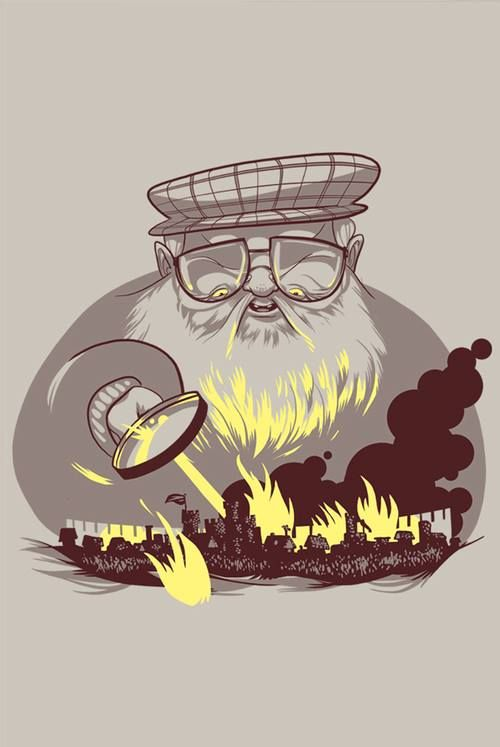

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [ ]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 59.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 35.1MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [ ]:
data = pd.read_csv('/content/game_of_thrones_train.csv', index_col='S.No')
data.head(5)

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

In [ ]:
data.isna().sum(axis=0)

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381
spouse,1357


In [ ]:
data['house'] = data['name'].str.extract(r'(\w+)$')
data['last_name'] = data['house'].str.extract(r'(\w+)$')

data['house'] = data['house'].combine_first(data['last_name'])
data['house'] = data['house'].fillna('other')
data['house'].value_counts()

value_counts = data['house'].value_counts()
data['house'] = data['house'].replace( (value_counts[value_counts < 3].index), 'other')
data['house'].value_counts()

,count
house,
other,917
Frey,72
Targaryen,27
Stark,26
Tyrell,24
...,...
Grafton,3
Waters,3
Penny,3


In [ ]:
value_counts = data['title'].value_counts()
data['title'] = data['title'].replace( (value_counts[value_counts < 3].index), 'other')
data['title'] = data['title'].fillna('other')
data['title'].value_counts()

,count
title,
other,1031
Ser,306
Maester,29
Archmaester,21
Lord,19
Septon,16
Winterfell,15
Lady,10
King in the North,9


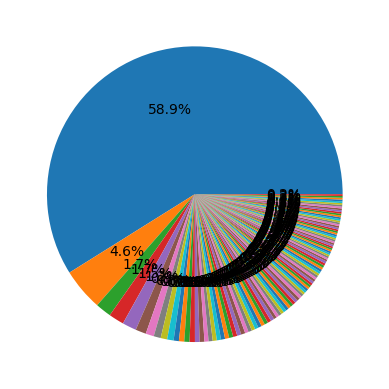

In [ ]:
plt.pie(data['house'].value_counts(), autopct='%1.1f%%')

plt.show()

In [ ]:
data[data['house'] == 'other']['isAlive'].value_counts()

,count
isAlive,
1,718
0,199


In [ ]:
data = data.drop(columns=['name', 'last_name'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoding1 = LabelEncoder()
label_encoding2 = LabelEncoder()

# Fit and transform the categorical data
for column in data:
  data['title'] = label_encoding1.fit_transform(data['title'])
  data['house'] = label_encoding2.fit_transform(data['house'])
data.head(20)

,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,book1,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,30,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,88,NaN,0,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,30,1,Rivermen,208.0,NaN,NaN,NaN,29,Perra Royce,1,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,26,1,NaN,NaN,NaN,NaN,NaN,40,NaN,0,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,23,0,NaN,82.0,NaN,NaN,NaN,1,Viserys I Targaryen,0,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,30,0,Dornish,276.0,NaN,NaN,NaN,103,Eldon Estermont,0,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
6,30,1,NaN,NaN,Cersei Lannister,Robert Baratheon,Myrcella Baratheon,3,NaN,0,...,1.0,1.0,1.0,NaN,0,0,NaN,5,1.000000,1
7,30,1,Valyrian,183.0,NaN,NaN,NaN,88,Kiera of Tyrosh,0,...,NaN,NaN,NaN,1.0,1,1,26.0,0,0.431438,0
8,30,1,NaN,NaN,Alyssa Targaryen,Baelon Targaryen,Rhaenyra Targaryen,88,NaN,0,...,1.0,1.0,1.0,NaN,0,0,NaN,5,0.678930,0
9,26,1,NaN,NaN,NaN,NaN,NaN,103,NaN,0,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.006689,0


In [ ]:
data.loc[data['male'] == 0, ['male']] = -1
data.head(10)

,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,book1,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,30,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,88,NaN,0,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,30,1,Rivermen,208.0,NaN,NaN,NaN,29,Perra Royce,1,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,26,1,NaN,NaN,NaN,NaN,NaN,40,NaN,0,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,23,-1,NaN,82.0,NaN,NaN,NaN,1,Viserys I Targaryen,0,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,30,-1,Dornish,276.0,NaN,NaN,NaN,103,Eldon Estermont,0,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
6,30,1,NaN,NaN,Cersei Lannister,Robert Baratheon,Myrcella Baratheon,3,NaN,0,...,1.0,1.0,1.0,NaN,0,0,NaN,5,1.000000,1
7,30,1,Valyrian,183.0,NaN,NaN,NaN,88,Kiera of Tyrosh,0,...,NaN,NaN,NaN,1.0,1,1,26.0,0,0.431438,0
8,30,1,NaN,NaN,Alyssa Targaryen,Baelon Targaryen,Rhaenyra Targaryen,88,NaN,0,...,1.0,1.0,1.0,NaN,0,0,NaN,5,0.678930,0
9,26,1,NaN,NaN,NaN,NaN,NaN,103,NaN,0,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.006689,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             1557 non-null   int64  
 1   male              1557 non-null   int64  
 2   culture           488 non-null    object 
 3   dateOfBirth       279 non-null    float64
 4   mother            18 non-null     object 
 5   father            22 non-null     object 
 6   heir              21 non-null     object 
 7   house             1557 non-null   int64  
 8   spouse            200 non-null    object 
 9   book1             1557 non-null   int64  
 10  book2             1557 non-null   int64  
 11  book3             1557 non-null   int64  
 12  book4             1557 non-null   int64  
 13  book5             1557 non-null   int64  
 14  isAliveMother     18 non-null     float64
 15  isAliveFather     22 non-null     float64
 16  isAliveHeir       21 non-null     float64
 17  

In [ ]:
data = data.drop(columns=['mother', 'father', 'heir', 'spouse' , 'dateOfBirth'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             1557 non-null   int64  
 1   male              1557 non-null   int64  
 2   culture           488 non-null    object 
 3   house             1557 non-null   int64  
 4   book1             1557 non-null   int64  
 5   book2             1557 non-null   int64  
 6   book3             1557 non-null   int64  
 7   book4             1557 non-null   int64  
 8   book5             1557 non-null   int64  
 9   isAliveMother     18 non-null     float64
 10  isAliveFather     22 non-null     float64
 11  isAliveHeir       21 non-null     float64
 12  isAliveSpouse     200 non-null    float64
 13  isMarried         1557 non-null   int64  
 14  isNoble           1557 non-null   int64  
 15  age               279 non-null    float64
 16  numDeadRelations  1557 non-null   int64  
 17  

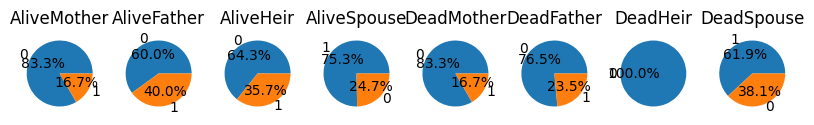

In [ ]:
# Готовим данные для графика
data1 = data[data['isAliveMother'] == 1]['isAlive'].value_counts()
data2 = data[data['isAliveFather'] == 1]['isAlive'].value_counts()
data3 = data[data['isAliveHeir'] == 1]['isAlive'].value_counts()
data4 = data[data['isAliveSpouse'] == 1]['isAlive'].value_counts()
data5 = data[data['isAliveMother'] == 0]['isAlive'].value_counts()
data6 = data[data['isAliveFather'] == 0]['isAlive'].value_counts()
data7 = data[data['isAliveHeir'] == 0]['isAlive'].value_counts()
data8 = data[data['isAliveSpouse'] == 0]['isAlive'].value_counts()

# Строим круговую диаграмму
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(1, 8, figsize=(10,8))

ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')
ax3.pie(data3.values, labels=data3.index, autopct='%1.1f%%')
ax4.pie(data4.values, labels=data4.index, autopct='%1.1f%%')
ax5.pie(data5.values, labels=data5.index, autopct='%1.1f%%')
ax6.pie(data6.values, labels=data6.index, autopct='%1.1f%%')
ax7.pie(data7.values, labels=data7.index, autopct='%1.1f%%')
ax8.pie(data8.values, labels=data8.index, autopct='%1.1f%%')

ax1.set_title("AliveMother")
ax2.set_title("AliveFather")
ax3.set_title("AliveHeir")
ax4.set_title("AliveSpouse")
ax5.set_title("DeadMother")
ax6.set_title("DeadFather")
ax7.set_title("DeadHeir")
ax8.set_title("DeadSpouse")

#plt.legend(['не выжил, выжил'])

plt.show()

In [ ]:
data['isAliveFatherOrHeir'] = (data['isAliveFather']) + (data['isAliveHeir'])
#data['isAliveFatherOrHeir'] = data['isAliveFather'].replace(0, -1)
#data['isAliveFatherOrHeir'] = data['isAliveFather'].replace(2, 1)
##data['isAliveFatherOrHeir'] = data['isAliveFather'].replace(1, 1)
#data['isAliveFatherOrHeir'] = data['isAliveFatherOrHeir'].fillna(0.0)
#data['isAliveFatherOrHeir'].head(10)
print(data['isAliveFatherOrHeir'].value_counts())
data = data.drop(columns = ['isAliveFatherOrHeir'])

isAliveFatherOrHeir
1.0    8
0.0    6
2.0    4
Name: count, dtype: int64


Вывод: Объединять и/или сохранять поля isAliveMother isAliveFather isAliveHeir бессмысленно, т.к. их слишком мало в обучающей выборке.

In [ ]:
data = data.drop(columns = ['isAliveFather', 'isAliveHeir', 'isAliveMother'])

In [ ]:
data = data.drop(columns = ['isAliveSpouse'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             1557 non-null   int64  
 1   male              1557 non-null   int64  
 2   culture           488 non-null    object 
 3   house             1557 non-null   int64  
 4   book1             1557 non-null   int64  
 5   book2             1557 non-null   int64  
 6   book3             1557 non-null   int64  
 7   book4             1557 non-null   int64  
 8   book5             1557 non-null   int64  
 9   isMarried         1557 non-null   int64  
 10  isNoble           1557 non-null   int64  
 11  age               279 non-null    float64
 12  numDeadRelations  1557 non-null   int64  
 13  popularity        1557 non-null   float64
 14  isAlive           1557 non-null   int64  
dtypes: float64(2), int64(12), object(1)
memory usage: 194.6+ KB


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [ ]:
##data['isPopular'] = 1 if (data['popularity'] >= 0.5) else 0
data['isPopular'] = data['popularity'] >= 0.5
data['isPopular'].value_counts()

,count
isPopular,
False,1530
True,27


In [ ]:
data['boolDeadRelations'] = data['numDeadRelations'] > 0
data['boolDeadRelations'].value_counts()

,count
boolDeadRelations,
False,1488
True,69


In [ ]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [ ]:
for key in cult.keys():
  data['culture'] = data['culture'].replace(cult[key], key)
data['culture'] = data['culture'].fillna('other')

value_counts = data['culture'].value_counts()
data['culture'] = data['culture'].replace( (value_counts[value_counts < 3].index), 'other')
data['culture'].value_counts()

,count
culture,
other,1099
Northmen,103
Ironborn,91
Free Folk,46
Braavosi,39
Valyrian,28
Dothraki,17
Dornish,17
Ghiscari,17


In [ ]:
data['age'] = data['age'].fillna(0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1557 non-null   int64  
 1   male               1557 non-null   int64  
 2   culture            1557 non-null   object 
 3   house              1557 non-null   int64  
 4   book1              1557 non-null   int64  
 5   book2              1557 non-null   int64  
 6   book3              1557 non-null   int64  
 7   book4              1557 non-null   int64  
 8   book5              1557 non-null   int64  
 9   isMarried          1557 non-null   int64  
 10  isNoble            1557 non-null   int64  
 11  age                1557 non-null   float64
 12  numDeadRelations   1557 non-null   int64  
 13  popularity         1557 non-null   float64
 14  isAlive            1557 non-null   int64  
 15  isPopular          1557 non-null   bool   
 16  boolDeadRelations  1557 non-n

In [ ]:
label_encoding3 = LabelEncoder()

# Fit and transform the categorical data
for column in data:
  data['culture'] = label_encoding3.fit_transform(data['culture'])

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1557 non-null   int64  
 1   male               1557 non-null   int64  
 2   culture            1557 non-null   int64  
 3   house              1557 non-null   int64  
 4   book1              1557 non-null   int64  
 5   book2              1557 non-null   int64  
 6   book3              1557 non-null   int64  
 7   book4              1557 non-null   int64  
 8   book5              1557 non-null   int64  
 9   isMarried          1557 non-null   int64  
 10  isNoble            1557 non-null   int64  
 11  age                1557 non-null   float64
 12  numDeadRelations   1557 non-null   int64  
 13  popularity         1557 non-null   float64
 14  isAlive            1557 non-null   int64  
 15  isPopular          1557 non-null   bool   
 16  boolDeadRelations  1557 non-n

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [ ]:
data.drop(columns=['numDeadRelations', 'popularity'], inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1557 non-null   int64  
 1   male               1557 non-null   int64  
 2   culture            1557 non-null   int64  
 3   house              1557 non-null   int64  
 4   book1              1557 non-null   int64  
 5   book2              1557 non-null   int64  
 6   book3              1557 non-null   int64  
 7   book4              1557 non-null   int64  
 8   book5              1557 non-null   int64  
 9   isMarried          1557 non-null   int64  
 10  isNoble            1557 non-null   int64  
 11  age                1557 non-null   float64
 12  isAlive            1557 non-null   int64  
 13  isPopular          1557 non-null   bool   
 14  boolDeadRelations  1557 non-null   bool   
dtypes: bool(2), float64(1), int64(12)
memory usage: 173.3 KB


**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

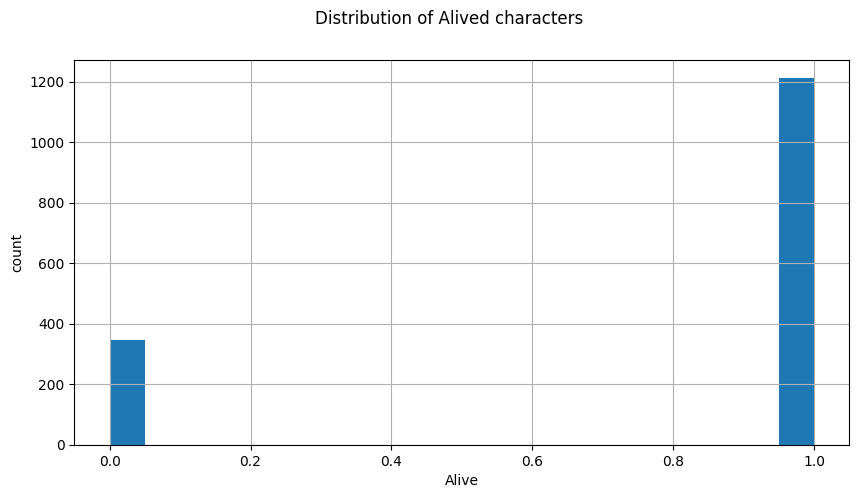

In [ ]:
plt.figure(figsize = (10, 5))

data['isAlive'].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel('Alive')

plt.suptitle('Distribution of Alived characters')
plt.show()

Датасет не сбалансированный: живых персонажей в 3-4 раза больше мёртвых.

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

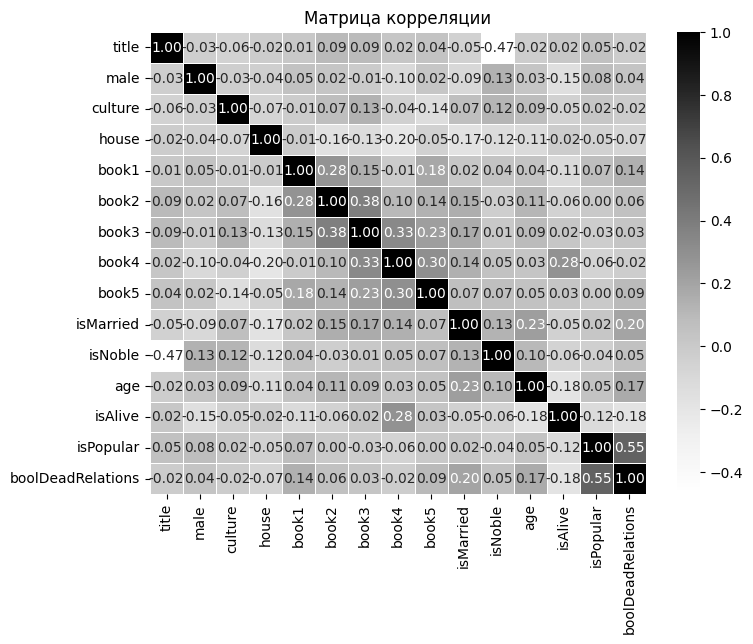

In [ ]:
corr_matrix = data.corr()

# Построение тепловой карты
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Greys', fmt='.2f', linewidths=0.5)
plt.title('Матрица корреляции')
plt.show()

In [ ]:
data.drop(columns=['title', 'culture', 'house', 'book2', 'book3', 'book5', 'isMarried', 'isNoble'], inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   male               1557 non-null   int64  
 1   book1              1557 non-null   int64  
 2   book4              1557 non-null   int64  
 3   age                1557 non-null   float64
 4   isAlive            1557 non-null   int64  
 5   isPopular          1557 non-null   bool   
 6   boolDeadRelations  1557 non-null   bool   
dtypes: bool(2), float64(1), int64(4)
memory usage: 76.0 KB


In [ ]:
data.head(5)

,male,book1,book4,age,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,
1,1,0,0,0.0,0,True,True
2,1,1,1,97.0,1,True,True
3,1,0,1,0.0,1,False,False
4,-1,0,0,23.0,0,False,False
5,-1,0,1,29.0,1,False,False


**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [ ]:
X = data.drop(columns=['isAlive']).values
y = data['isAlive'].values

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, shuffle=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaller = MinMaxScaler()
scaller.fit(X_train)

X_train = scaller.transform(X_train)
X_test = scaller.transform(X_test)

In [ ]:
print(X_train.mean(axis = 0))
print(X_test.mean(axis = 0))

[0.59011061 0.13923227 0.56083279 0.06359141 0.01756669 0.04424203]
[0.65  0.1   0.7   0.036 0.    0.05 ]


## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


Импорт всех необходимых модулей

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

Обучение различных моделей

# LogisticRegression

In [ ]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(max_iter=1554)

# Шаг 2. подбор наилучших гиперпараметров
param_grid = {
    'C' : [0.01, 0.1, 1, 10],
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'saga', 'sag'],
    'class_weight' : ['balanced', None],
    'fit_intercept' : [True, False]
}

grid_search = GridSearchCV(logistic_regression, param_grid, refit=True)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

# Выбор наилучших гиперпараметров и вывод результатов
logistic_regression = grid_search.best_estimator_

print("Accuracy on train: %.4f" % accuracy_score(y_train, logistic_regression.predict(X_train)) )
print("Accuracy on tests: %.4f" % accuracy_score(y_test, logistic_regression.predict(X_test)) )

{'C': 1, 'class_weight': None, 'fit_intercept': True, 'solver': 'newton-cg'}
Accuracy on train: 0.7983
Accuracy on tests: 0.8500


## AdaBoostClassifier

In [ ]:
ada = AdaBoostClassifier()

param_grid = {
    'learning_rate' : [0.01, 0.1, 1, 10]
}

grid_search = GridSearchCV(ada, param_grid, refit=True)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

ada = grid_search.best_estimator_

print("Accuracy on train: %.4f" % accuracy_score( y_train, ada.predict(X_train)) )
print("Accuracy on tests: %.4f" % accuracy_score(y_test, ada.predict(X_test)) )

{'learning_rate': 1}
Accuracy on train: 0.8074
Accuracy on tests: 0.8500


# RandomForestClassifier

In [ ]:
random_forest_classifier = RandomForestClassifier()

param_grid = {
    'n_estimators' : [10, 100],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [None, 1, 2, 3, 4, 5],
    'min_samples_leaf' : [2, 3, 4, 5],
    'max_features' : ['sqrt', 'log2', 0.25, 0.5, 0.75, None],
    'bootstrap' : [True, False],
    'class_weight' : ['balanced', 'balanced_subsample', None]
}

grid_search = GridSearchCV(random_forest_classifier, param_grid, refit=True)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

random_forest_classifier = grid_search.best_estimator_

print("Accuracy on train: %.4f" % accuracy_score(y_train, random_forest_classifier.predict(X_train)) )
print("Accuracy on tests: %.4f" % accuracy_score(y_test, random_forest_classifier.predict(X_test)) )

{'bootstrap': True, 'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 0.25, 'min_samples_leaf': 5, 'n_estimators': 100}
Accuracy on train: 0.8146
Accuracy on tests: 0.8500


In [ ]:
param_grid = {
    'n_estimators' : [130, 140, 150],
    'min_samples_leaf' : [5],
    'max_features' : [0.275, 0.27, 0.265],
    'class_weight' : [None],
    'criterion' : ['entropy'],
    'max_depth' : [None]
}

grid_search = GridSearchCV(random_forest_classifier, param_grid, refit=True)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

random_forest_classifier = grid_search.best_estimator_

print("Accuracy on train: %.4f" % accuracy_score(y_train, random_forest_classifier.predict(X_train)) )
print("Accuracy on tests: %.4f" % accuracy_score(y_test, random_forest_classifier.predict(X_test)) )

{'class_weight': None, 'criterion': 'entropy', 'max_depth': None, 'max_features': 0.265, 'min_samples_leaf': 5, 'n_estimators': 140}
Accuracy on train: 0.8139
Accuracy on tests: 0.8500


# GaussianProcessClassifier

In [ ]:
# Шаг 1. создание модели
gauss = GaussianProcessClassifier()

param_grid = {
    'kernel' : [None],
    'optimizer' : ['fmin_l_bfgs_b', None],
    'multi_class' : ['one_vs_one']
}

grid_search = GridSearchCV(gauss, param_grid, refit=True)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

gauss = grid_search.best_estimator_

print("Accuracy on train: %.4f" % accuracy_score(y_train, gauss.predict(X_train)) )
print("Accuracy on tests: %.4f" % accuracy_score(y_test, gauss.predict(X_test)) )

{'kernel': None, 'multi_class': 'one_vs_one', 'optimizer': 'fmin_l_bfgs_b'}
Accuracy on train: 0.8068
Accuracy on tests: 0.9000


# GaussianNB

In [ ]:
# Шаг 1. создание модели
gaussiannb = GaussianNB()

# Шаг 2. обучение модели
gaussiannb .fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_test_pred = gaussiannb .predict(X_test)
y_train_pred = gaussiannb .predict(X_train)

acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

print("Accuracy on train: %.4f" % acc_train)
print("Accuracy on tests: %.4f" % acc_test)

Accuracy on train: 0.7820
Accuracy on tests: 0.8000


# KNeighborsClassifier

In [ ]:
# Шаг 1. создание модели
knn = KNeighborsClassifier(n_neighbors = 5, algorithm='brute')

param_grid = {
    'n_neighbors' : [1, 2, 3, 4, 5, 7, 10],
    'algorithm' : ['brute', 'ball_tree', 'kd_tree'],
    'metric' : ['euclidean', 'manhattan'],
    'p' : [1 , 2]
}

grid_search = GridSearchCV(knn, param_grid, refit=True)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

knn = grid_search.best_estimator_

print("Accuracy on train: %.4f" % accuracy_score(y_train, knn.predict(X_train)) )
print("Accuracy on tests: %.4f" % accuracy_score(y_test, knn.predict(X_test)) )

{'algorithm': 'brute', 'metric': 'manhattan', 'n_neighbors': 3, 'p': 1}
Accuracy on train: 0.8185
Accuracy on tests: 0.8000


# SVC

In [ ]:
# Шаг 1. создание модели
svc  = SVC()

param_grid = {
    'C' : [850, 800, 750],
    'kernel' : ['rbf'],
    'probability' : [True],
    'decision_function_shape' : ['ovo']
}

grid_search = GridSearchCV(svc, param_grid, refit=True)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

svc = grid_search.best_estimator_

print("Accuracy on train: %.4f" % accuracy_score(y_train, svc.predict(X_train)) )
print("Accuracy on tests: %.4f" % accuracy_score(y_test, svc.predict(X_test)) )

{'C': 800, 'decision_function_shape': 'ovo', 'kernel': 'rbf', 'probability': True}
Accuracy on train: 0.8217
Accuracy on tests: 0.8500


In [ ]:

# Шаг 1. создание модели
decTree  = DecisionTreeClassifier()

param_grid = {
    'criterion' : ['gini', 'entropy'],
    'splitter' : ['best', 'random'],
    'max_depth' : [None, 1, 2, 3, 4, 5],
    'min_samples_split' : [2, 3, 4, 0.25, 0.5, 0.75],
    'max_features' : ['auto', 'log2', None, 0.25, 0.5, 0.75],
    'class_weight' : ['balanced', None]

}

grid_search = GridSearchCV(decTree, param_grid, refit=True)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

decTree = grid_search.best_estimator_

print("Accuracy on train: %.4f" % accuracy_score(y_train, decTree.predict(X_train)) )
print("Accuracy on tests: %.4f" % accuracy_score(y_test, decTree.predict(X_test)) )

{'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_split': 0.25, 'splitter': 'random'}
Accuracy on train: 0.8087
Accuracy on tests: 0.8500


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1440 fits failed out of a total of 8640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1440 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/u

## Часть 3. Выбор лучшей модели.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

Подготовка test

In [ ]:
data_test = pd.read_csv('/content/game_of_thrones_test.csv', index_col='S.No')

data_test = data_test.drop(columns=['name', 'title', 'culture',
                        'dateOfBirth', 'mother', 'father',
                        'heir', 'house', 'spouse',
                        'book2', 'book3', 'book5',
                        'isAliveMother', 'isAliveFather', 'isAliveHeir',
                        'isAliveSpouse', 'isMarried', 'isNoble'])

print(data_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 1558 to 1946
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   male              389 non-null    int64  
 1   book1             389 non-null    int64  
 2   book4             389 non-null    int64  
 3   age               154 non-null    float64
 4   numDeadRelations  389 non-null    int64  
 5   popularity        389 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 21.3 KB
None


In [ ]:
data_test.loc[data_test['male'] == 0, ['male']] = -1
data_test['age'] = data_test['age'].fillna(0)
data_test.loc[data_test['age'] < 0] = 0             ## Важная строчка (т.к. в файлике есть выбросы)
data_test['isPopular'] = data_test['popularity'] >= 0.5
data_test['boolDeadRelations'] = data_test['numDeadRelations'] > 0
data_test = data_test.drop(columns=['popularity', 'numDeadRelations'])
data_test.head(5)

,male,book1,book4,age,isPopular,boolDeadRelations
S.No,,,,,,
1558,-1,0,0,100.0,False,False
1559,-1,0,1,0.0,True,False
1560,-1,0,1,0.0,False,False
1561,1,1,1,0.0,False,False
1562,1,1,1,38.0,False,False


In [1]:
X_pred = scaller.transform(data_test.values)
print(X_pred.mean(axis = 0))

y_pred = svc.predict(X_pred)
print(y_pred)

NameError: name 'scaller' is not defined

In [ ]:
predicted_data = pd.DataFrame({
    'S.No' : np.arange(1558, 1947, 1),
    'isAlive' : y_pred
})

predicted_data.to_csv('submission.csv', index=False)